In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy as scp
import os

plt.style.use('fast')
#plt.rc('text', usetex=True)
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 30}

plt.rc('font', **font)

fl = {'probe2_dw': 0.1522e-3,
        'probe2_up': 0.1522e-3,
        'probe3_dw': 0.2419e-3,
        'probe3_up': 0.2419e-3,
        'probe4_dw': 0.2488e-3,
        'probe4_up': 0.2488e-3}

In [8]:
filepaths = ['..\Widerstand']
measurements = {}
for filepath in filepaths:
    for name in os.listdir(filepath):
        if name.endswith('.xlsx'):
            df = pd.read_excel(filepath + '\\' + name)
            arr = np.transpose(df.to_numpy())
            measurements[name.split('.')[0]] = arr

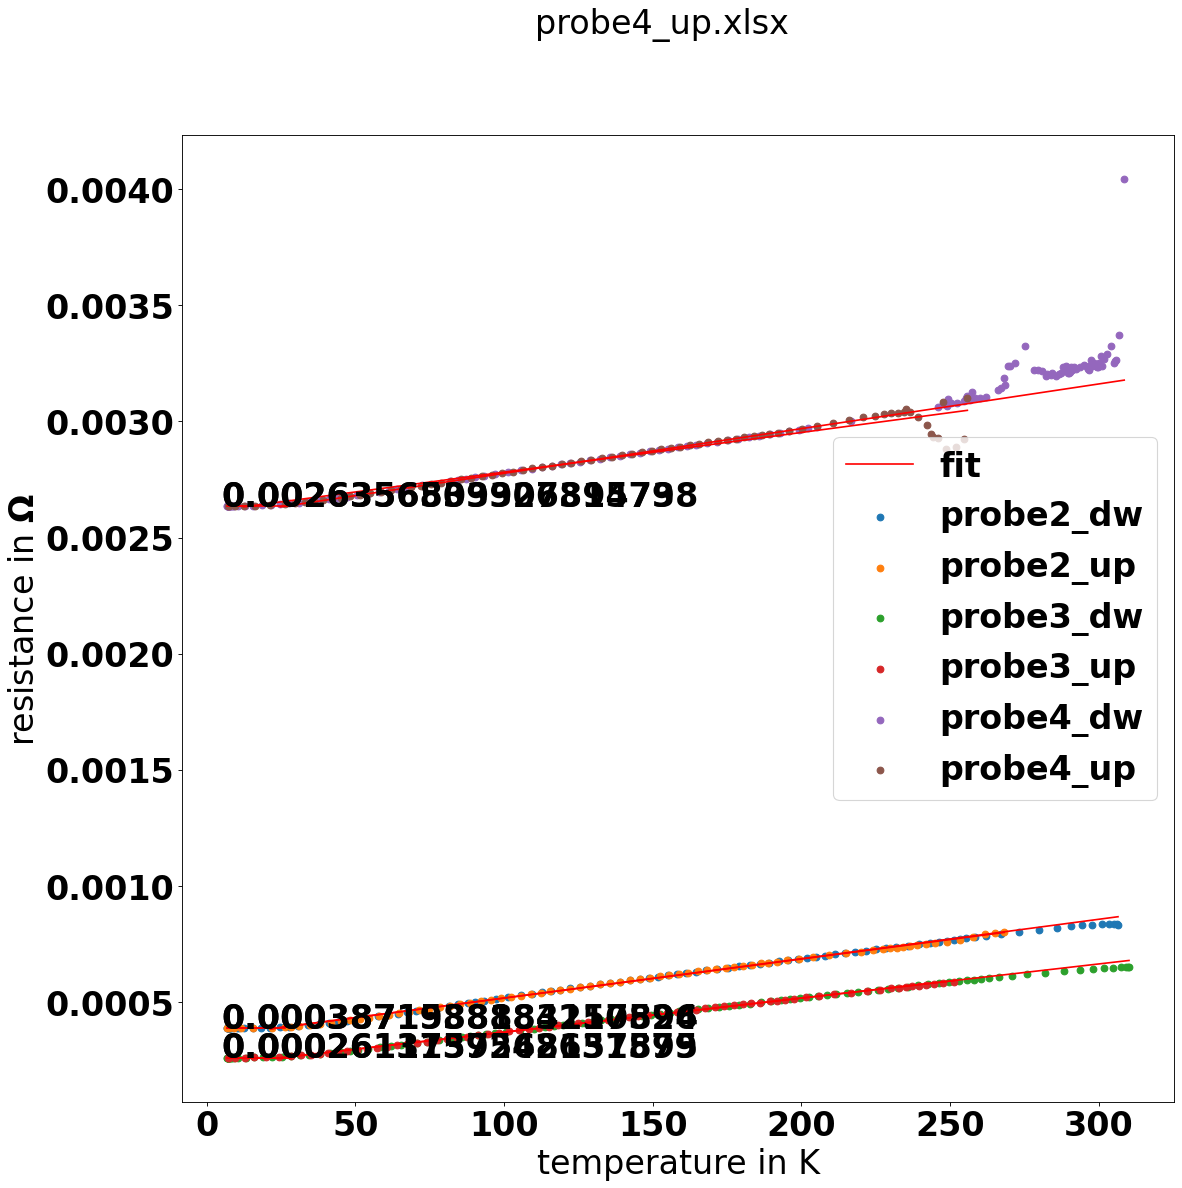

In [9]:
def f(x,a,b,c,d,e,f,g,h,i,j,k,l):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6 + h*x**7 + i*x**8 + j*x**9 + k*x**10 + l*x**11

def f2(x,a):
    return a

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))



def res_elements(res,temp,name):
    er = []
    eT = []

    thresh = {'probe2_dw_min':0.7e-5,'probe2_dw_max':4.5e-5,
            'probe2_up_min':0.7e-5,'probe2_up_max':2e-5,
            'probe3_dw_min':0.7e-5,'probe3_dw_max':7e-5,
            'probe3_up_min':0.5e-5,'probe3_up_max':2e-5,
            'probe4_dw_min':0.7e-5,'probe4_dw_max':2e-5,
            'probe4_up_min':0.7e-5,'probe4_up_max':2e-5,}
    thresh_min = thresh[name+"_min"]
    thresh_max = thresh[name+"_max"]
    start = 0 
    stop = 0
    sold = 0

    dx = []
    for i in range(len(res)-1):
        dx.append(res[i]-res[i+1])
    
    for i in range(len(dx)):
       # print(abs(dx[i]))
        if abs(dx[i]) > thresh_min and abs(dx[i]) < thresh_max:
            if start == sold:
                start = i
            else:
                stop = i
                #print(start,stop)
                er.append(np.average(res[start:stop]))
                eT.append(np.average(temp[start:stop]))
                sold = start
                start = i
    
    r = []
    t = []
    for i in range(0,len(er)-1,2):
        r.append(1/2*(er[i]+er[i+1]))
        t.append(1/2*(eT[i]+eT[i+1]))
    
    return r,t


fig = plt.figure(figsize=(16,16),dpi=80)
fig.tight_layout(pad=0.5, w_pad=3.5, h_pad=3.5)
fig.suptitle(name,size=30)

ax = fig.add_subplot(111)

for name in measurements:
    time = measurements[name][-1]
    resistance = measurements[name][-2]
    voltage = measurements[name][-3]
    current = measurements[name][-4]
    temperature = measurements[name][0]

    temp = []
    rtemp = []
    if temperature[0] > temperature[-1]:
        for i in range(len(temperature)):
            temp.append(temperature[-(i+1)])
            rtemp.append(resistance[-(i+1)])
        temperature = temp
        resistance = rtemp

    popt, pcov = opt.curve_fit(f,temperature,resistance)


    
    #ax = fig.add_subplot(321)
    #ax.scatter(time,temperature,marker=".",s=1)
    #ax.set(xlabel="time in s",ylabel="temperature in K")

    #ax = fig.add_subplot(322)
    #ax.scatter(time,current,marker=".",s=1)
    #ax.set(xlabel="time in s",ylabel="current in A")

    #ax = fig.add_subplot(323)
    #ax.scatter(time,voltage,marker=".",s=1)
    #ax.set(xlabel="time in s",ylabel="voltage in V")

    #ax = fig.add_subplot(324)
    #ax.scatter(time,resistance,marker=".",s=1)
    #ax.set(xlabel="time in s",ylabel=r"resistance in $\Omega$")


    #ax.scatter(temperature,resistance,marker=".",s=1)
    ax.set(xlabel="temperature in K",ylabel=r"resistance in $\Omega$")


    r,t = res_elements(resistance,temperature,name)
    index_l = 0
    index_h = 0
    for i in range(len(temperature)):
        if abs(temperature[i] - 50) < 1.5:
            #print("test",name,t[i])
            index_l = i
    for i in range(len(temperature)):
        if abs(temperature[i] - 250) < 4.5:
            #print("test",name,t[i])
            index_h = i

    #ax.plot(temperature,[f(x,*popt) for x in temperature],color="red",label="fit")
    def f3(x,a,b):
        return a + x*b
    
    index = 30
    popt, pcov = opt.curve_fit(f3,temperature[index_l:index_h],resistance[index_l:index_h])
    x = max(t)
    index = 0
    while f3(x,*popt) > f2(x,min(r)):
        x = x - 0.1
    for i,te in enumerate(t):
        if te > x:
            index = i
            break

    ax.plot(t[index-1:],[f3(x,*popt) for x in t[index-1:]],color="red",label="fit")
    ax.plot(t[:index+1],[f2(x,min(r)) for x in t[:index+1]],color="red",label="fit")
    ax.scatter(t,r,label=name)
    ax.annotate(min(r),(5,min(r)))
    #fig.legend()
    #ax.set_legend_handles_labels(test)

    
    legend_without_duplicate_labels(ax)
    #fig.legend()
    #print(test.set_label("pipipopo"))
    plt.savefig(name)
    #break


probe2_dw 5.8924821801663155e-08
[[2.05461352e-10            nan]
 [           nan 1.26172790e-12]]
<ipython-input-20-46a377b1311e>:137: RuntimeWarning: invalid value encountered in sqrt
  print(np.sqrt(pcov))
probe2_up 5.893166016368421e-08
[[2.48684822e-10            nan]
 [           nan 1.54124884e-12]]
probe3_dw 6.316394207925789e-08
[[2.25902674e-10            nan]
 [           nan 1.39930557e-12]]
probe3_up 6.322631177373947e-08
[[2.37498193e-10            nan]
 [           nan 1.47822181e-12]]
probe4_dw 6.557505640867368e-07
[[4.95061713e-10            nan]
 [           nan 3.07050654e-12]]
probe4_up 6.55757415580421e-07
[[1.74799459e-09            nan]
 [           nan 1.14453888e-11]]


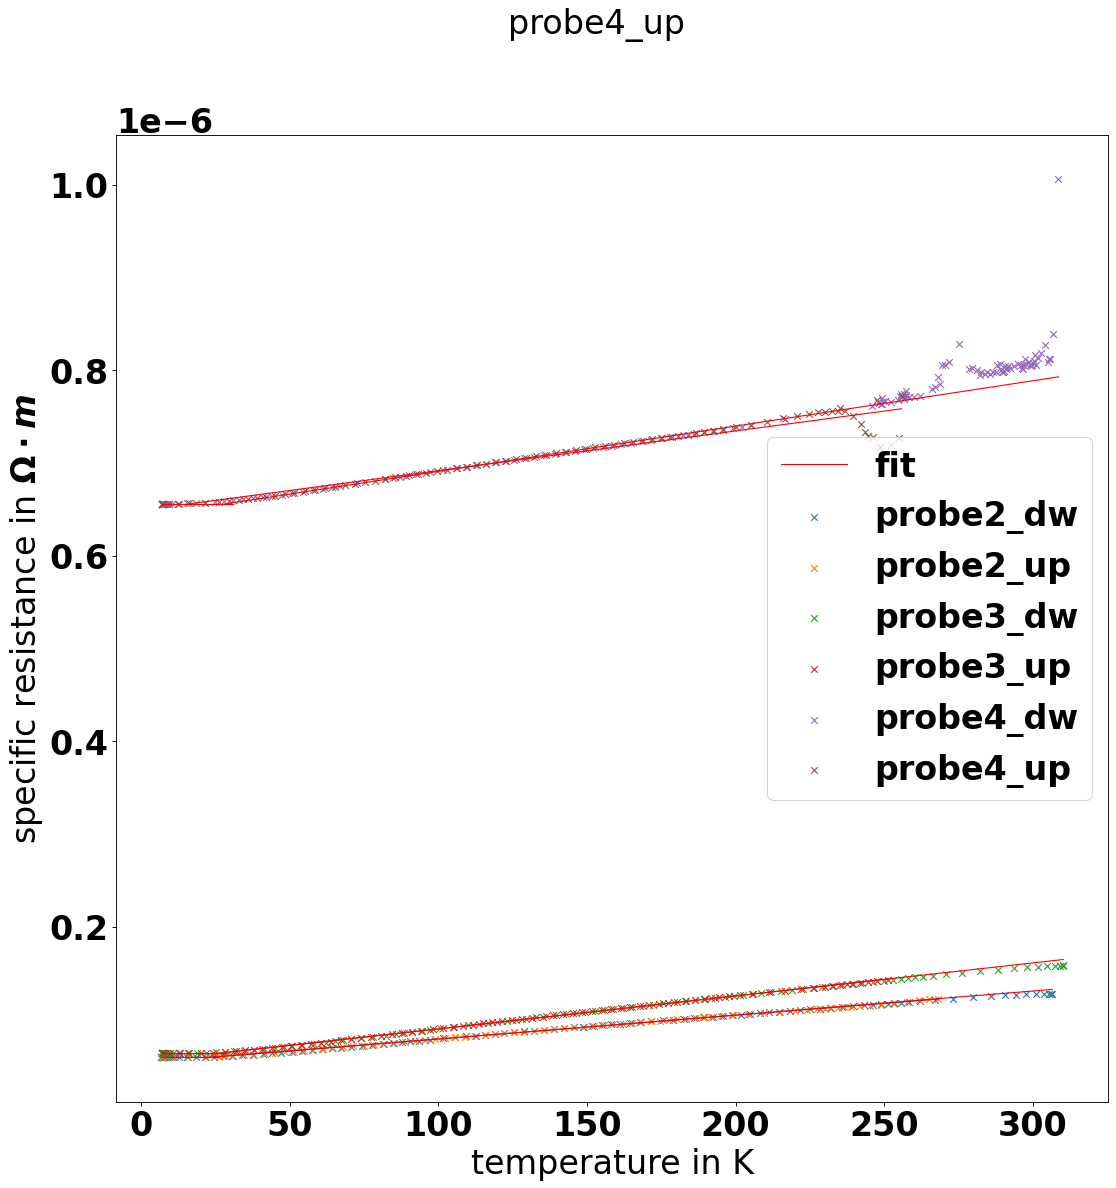

In [20]:
def f(x,a,b,c,d,e,f,g,h,i,j,k,l):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5 + g*x**6 + h*x**7 + i*x**8 + j*x**9 + k*x**10 + l*x**11

def f2(x,a):
    return a

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))



def res_elements(res,temp,name):
    er = []
    eT = []

    thresh = {'probe2_dw_min':0.7e-5,'probe2_dw_max':4.5e-5,
            'probe2_up_min':0.7e-5,'probe2_up_max':2e-5,
            'probe3_dw_min':0.7e-5,'probe3_dw_max':7e-5,
            'probe3_up_min':0.5e-5,'probe3_up_max':2e-5,
            'probe4_dw_min':0.7e-5,'probe4_dw_max':2e-5,
            'probe4_up_min':0.7e-5,'probe4_up_max':2e-5,}
    thresh_min = thresh[name+"_min"]
    thresh_max = thresh[name+"_max"]
    start = 0 
    stop = 0
    sold = 0

    dx = []
    for i in range(len(res)-1):
        dx.append(res[i]-res[i+1])
    
    for i in range(len(dx)):
       # print(abs(dx[i]))
        if abs(dx[i]) > thresh_min and abs(dx[i]) < thresh_max:
            if start == sold:
                start = i
            else:
                stop = i
                #print(start,stop)
                er.append(np.average(res[start:stop]))
                eT.append(np.average(temp[start:stop]))
                sold = start
                start = i
    
    r = []
    t = []
    for i in range(0,len(er)-1,2):
        r.append(1/2*(er[i]+er[i+1]))
        t.append(1/2*(eT[i]+eT[i+1]))
    
    return r,t


fig = plt.figure(figsize=(16,16),dpi=80)
fig.tight_layout(pad=0.5, w_pad=3.5, h_pad=3.5)
fig.suptitle(name,size=30)

ax = fig.add_subplot(111)

for name in measurements:
    time = measurements[name][-1]
    resistance = measurements[name][-2]
    voltage = measurements[name][-3]
    current = measurements[name][-4]
    temperature = measurements[name][0]

    temp = []
    rtemp = []
    if temperature[0] > temperature[-1]:
        for i in range(len(temperature)):
            temp.append(temperature[-(i+1)])
            rtemp.append(resistance[-(i+1)])
        temperature = temp
        resistance = rtemp

   # popt, pcov = opt.curve_fit(f,temperature,resistance)


    
    #ax = fig.add_subplot(321)
    #ax.scatter(time,temperature,marker=".",s=1)
    #ax.set(xlabel="time in s",ylabel="temperature in K")

    #ax = fig.add_subplot(322)
    #ax.scatter(time,current,marker=".",s=1)
    #ax.set(xlabel="time in s",ylabel="current in A")

    #ax = fig.add_subplot(323)
    #ax.scatter(time,voltage,marker=".",s=1)
    #ax.set(xlabel="time in s",ylabel="voltage in V")

    #ax = fig.add_subplot(324)
    #ax.scatter(time,resistance,marker=".",s=1)
    #ax.set(xlabel="time in s",ylabel=r"resistance in $\Omega$")


    #ax.scatter(temperature,resistance,marker=".",s=1)
    ax.set(xlabel="temperature in K",ylabel=r"specific resistance in $\Omega \cdot m$")


    r,t = res_elements(resistance,temperature,name)
    for i,e in enumerate(r):
        r[i] = e*fl[name]
    index_l = 0
    index_h = 0
    for i in range(len(t)):
        if abs(t[i] - 50) < 1.5:
            #print("test",name,t[i])
            index_l = i
    for i in range(len(t)):
        if abs(t[i] - 250) < 4.5:
            #print("test",name,t[i])
            index_h = i

    #ax.plot(temperature,[f(x,*popt) for x in temperature],color="red",label="fit")
    def f3(x,a,b):
        return a + x*b
    
    index = 30
    popt, pcov = opt.curve_fit(f3,t[index_l:index_h],r[index_l:index_h])
    x = max(t)
    index = 0
    while f3(x,*popt) > f2(x,min(r)):
        x = x - 0.1
    for i,te in enumerate(t):
        if te > x:
            index = i
            break

    ax.plot(t[index-1:],[f3(x,*popt) for x in t[index-1:]],color="red",label="fit",linestyle="-",linewidth=1)
    ax.plot(t[:index+1],[f2(x,min(r)) for x in t[:index+1]],color="red",label="fit",linestyle="-",linewidth=1)
    ax.scatter(t,r,label=name,marker="x",linewidth=1)
    #ax.annotate(min(r),(5,min(r)))
    print(name,min(r))
    print(np.sqrt(pcov))
    #fig.legend()
    #ax.set_legend_handles_labels(test)

    
    legend_without_duplicate_labels(ax)
    #fig.legend()
    #print(test.set_label("pipipopo"))
    plt.savefig(name)
    #break
